In [14]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
comp_prob = pd.read_csv("C:/Python/Datasets/comp_prob.csv")
comp_prob

,y_test,yprob_1,yprob_2
0,1,0.6,0.70
1,1,0.4,0.45
2,0,0.8,0.90
3,0,0.2,0.20
4,0,0.3,0.15
5,1,0.6,0.70
6,0,0.3,0.30
7,0,0.8,0.60
8,1,0.6,0.70
9,0,0.3,0.20


In [3]:
y_pred_probs1 = comp_prob['yprob_1']
y_pred_probs2 = comp_prob['yprob_2']
y_test = comp_prob['y_test']

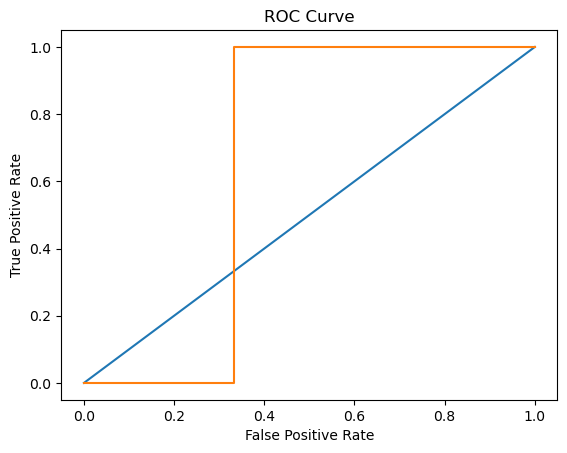

In [4]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs1)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [5]:
roc_auc_score(y_test, y_pred_probs1)

0.6666666666666666

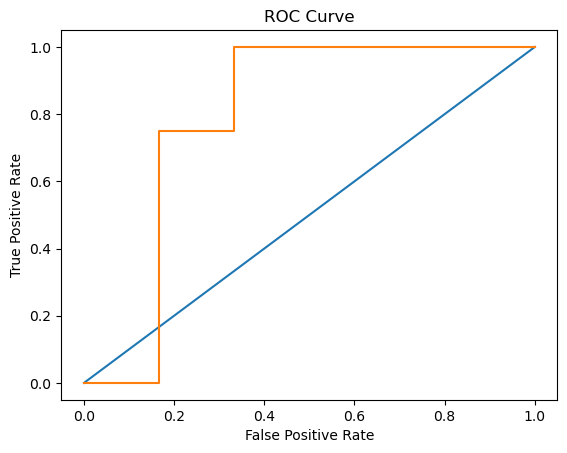

In [6]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs2)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [7]:
roc_auc_score(y_test, y_pred_probs2)

0.7916666666666666

In [8]:
hr = pd.read_csv("C:/Python/Cases/human-resources-analytics/HR_comma_sep.csv")
dum_hr = pd.get_dummies(hr, drop_first=True)
X = dum_hr.drop('left', axis=1)
y = dum_hr['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                    stratify=y)

c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


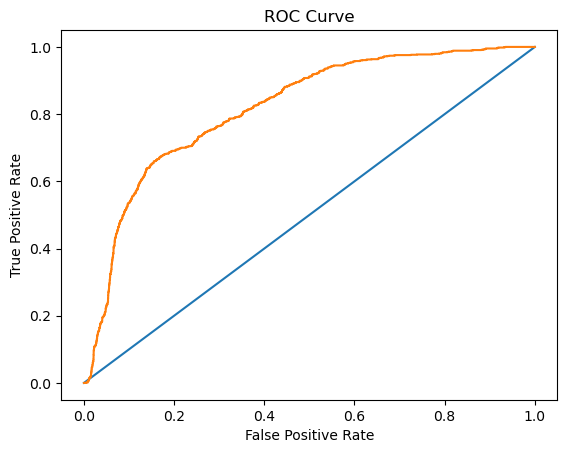

In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_prob = lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [10]:
roc_auc_score(y_test, y_pred_prob[:,1])

0.8173487270477483

In [11]:
solver = ['sag','newton-cg','newton-cholesky','lbfgs']
penalties = ['l2',None]
scores = []
for p in penalties:
    for s in solver:
        lr = LogisticRegression(solver=s, penalty=p)
        lr.fit(X_train, y_train)
        y_pred_prob = lr.predict_proba(X_test)
        scores.append([p,s, roc_auc_score(y_test, y_pred_prob[:,1])])
df_scores = pd.DataFrame( scores, columns=['penalty','solver','score'] )
df_scores.sort_values('score', ascending=False)

c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\s

,penalty,solver,score
1,l2,newton-cg,0.822433
5,None,newton-cg,0.822321
2,l2,newton-cholesky,0.822268
6,None,newton-cholesky,0.822144
3,l2,lbfgs,0.817349
7,None,lbfgs,0.817280
0,l2,sag,0.810192
4,None,sag,0.810177


In [15]:
scaler = StandardScaler()
X_trn_scl = scaler.fit_transform(X_train)
X_tst_scl = scaler.transform(X_test)
Ks = [1,2,3,4,5,6,7,8,9,10]
scores = []
for k in Ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_trn_scl, y_train)
    y_pred_prob = knn.predict_proba(X_tst_scl)
    scores.append([k, roc_auc_score( y_test, y_pred_prob[:,1] )])
df_scores = pd.DataFrame( scores, columns=['k', 'score'] )
df_scores.sort_values('score', ascending=False)

,k,score
4,5,0.976023
8,9,0.975783
5,6,0.975670
6,7,0.975559
7,8,0.975373
9,10,0.975260
2,3,0.975210
3,4,0.974600
1,2,0.971977
0,1,0.963983
